<a href="https://colab.research.google.com/github/rajiv-ranjan/cds-mini-projects/blob/saif/m2/mini-project-1/M2_NB_MiniProject_1_LinearRegression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Linear Regression with Regularization

## Problem Statement

Predict the bike-sharing counts per hour based on the features including weather, day, time, humidity, wind speed, season e.t.c.

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration and visualization
* implement linear regression using sklearn and optimization
* apply regularization on regression using Lasso, Ridge and Elasticnet techniques
* calculate and compare the MSE value of each regression technique
* analyze the features that are best contributing to the target

### Dataset

The dataset chosen for this mini-project is [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset).  This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the capital bike share system with the corresponding weather and seasonal information. This dataset consists of 17389 instances of 16 features.

Bike sharing systems are a new generation of traditional bike rentals where the whole process from membership, rental and return has become automatic. Through these systems, the user can easily rent a bike from a particular position and return to another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. As opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position are explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that the most important events in the city could be detected via monitoring these data.

<img src="https://s26551.pcdn.co/wp-content/uploads/2012/02/resize-va-sq-bikeshare.jpg" alt="drawing" width="400"/>

### Data Fields

* dteday - hourly date
* season - 1:winter, 2:spring, 3:summer, 4:fall
* hr - hour
* holiday - whether the day is considered a holiday
* workingday - whether the day is neither a weekend nor holiday
* weathersit -<br>
    1 - Clear, Few clouds, Partly cloudy, Partly cloudy <br>
    2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
    3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
    4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>   
* temp - temperature in Celsius
* atemp - "feels like" temperature in Celsius
* humidity - relative humidity
* windspeed - wind speed
* casual - number of non-registered user rentals initiated
* registered - number of registered user rentals initiated
* cnt - number of total rentals

## Information

**Regularization:** It is a form of regression that shrinks the coefficient estimates towards zero. In other words, this technique discourages learning a more complex or flexible model, to avoid the risk of overfitting. A simple relation for linear regression looks like this.

$Y ≈ β_0 + β_1 X_1 + β_2 X_2 + …+ β_p X_p$

 Here $Y$ represents the learned relation and $β$ represents the coefficient estimates for different variables or predictors(X).

 If there is noise in the training data, then the estimated coefficients won’t generalize well to the future data. This is where regularization comes in and shrinks or regularizes these learned estimates towards zero.

Below are the Regularization techniques:

 * Ridge Regression
 * Lasso Regression
 * Elasticnet Regression

## Grading = 10 Points

In [1]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Bike_Sharing_Dataset.zip
!unzip Bike_Sharing_Dataset.zip

Archive:  Bike_Sharing_Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### Importing Necessary Packages

In [31]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from scipy.linalg import lstsq
from sklearn import linear_model
from sklearn.metrics import mean_squared_error , mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Data Loading

In [3]:
# Read the hour.csv file
# YOUR CODE HERE
df = pd.read_csv('hour.csv')

print the first five rows of dataset

In [4]:
# YOUR CODE HERE
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


print the datatypes of the columns

In [5]:
# YOUR CODE HERE
df.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64


### Task flow with respect to feature processing and model training

* Explore and analyze the data

* Identify continuous features and categorical features

* Apply scaling on continuous features and one-hot encoding on categorical features

* Separate the features, targets and split the data into train and test

* Find the coefficients of the features using normal equation and find the cost (error)

* Apply batch gradient descent technique and find the best coefficients

* Apply SGD Regressor using sklearn

* Apply linear regression using sklearn

* Apply Lasso, Ridge, Elasticnet Regression

### EDA &  Visualization ( 2 points)

#### Visualize the hour (hr) column with an appropriate plot and find the busy hours of bike sharing

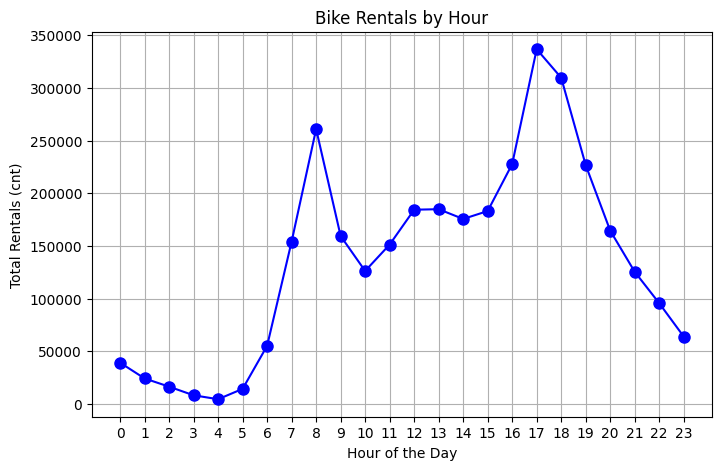

In [6]:
# YOUR CODE HERE
hourly_data = df.groupby('hr')['cnt'].sum()

plt.figure(figsize=(8,5))
plt.plot(hourly_data.index, hourly_data.values, marker='o', color='b', linestyle='-', markersize=8)
plt.title('Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rentals (cnt)')
plt.xticks(range(0, 24))
plt.grid(True)

plt.show()

#### Visualize the distribution of count, casual and registered variables

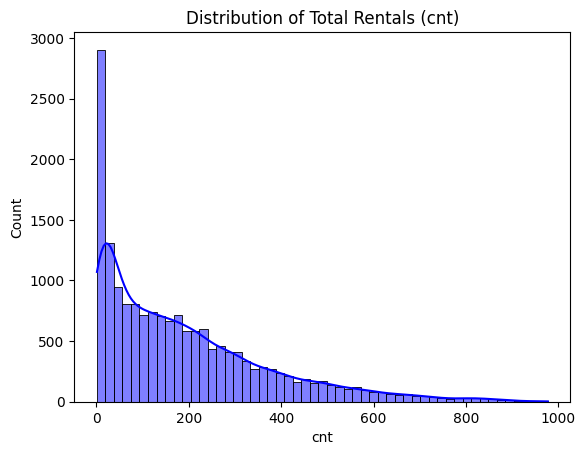

In [7]:
# YOUR CODE HERE for distribuiton of count variable
sns.histplot(df['cnt'], kde=True, color='Blue')
plt.title('Distribution of Total Rentals (cnt)')

plt.show()

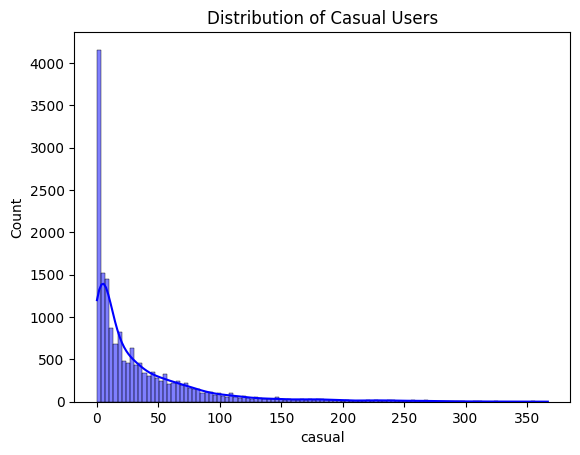

In [8]:
# YOUR CODE HERE for distribuiton of casual variable
sns.histplot(df['casual'], kde=True, color='Blue')
plt.title('Distribution of Casual Users')

plt.show()

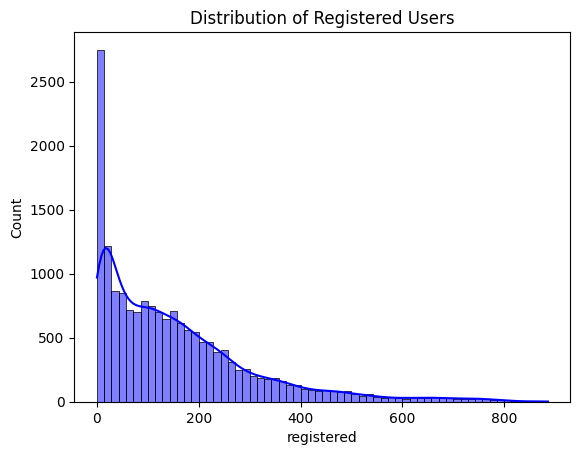

In [9]:
# YOUR CODE HERE for distribuiton of registered variable
sns.histplot(df['registered'], kde=True, color='Blue')
plt.title('Distribution of Registered Users')

plt.show()

#### Describe the relation of weekday, holiday and working day

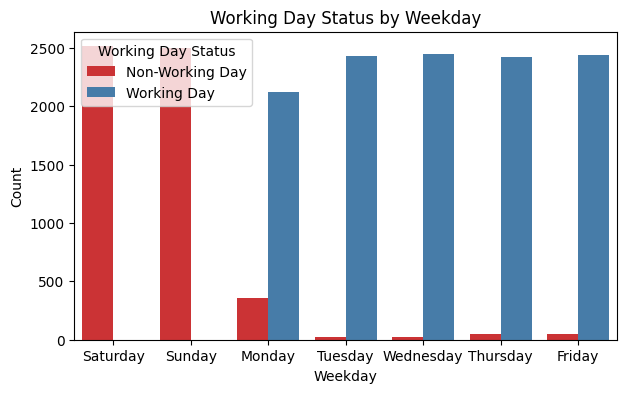

In [10]:
# YOUR CODE HERE
df['weekday_name'] = df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
df['working_day_status'] = df.apply(lambda row: 'Working Day' if row['weekday'] not in [0, 6] and row['holiday'] == 0 else 'Non-Working Day', axis=1)

plt.figure(figsize=(7,4))
sns.countplot(x='weekday_name', hue='working_day_status', data=df, palette="Set1", dodge=True)

plt.title('Working Day Status by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.legend(title='Working Day Status')
plt.show()

#### Visualize the month wise count of both casual and registered for the year 2011 and 2012 separately.

Hint: Stacked barchart

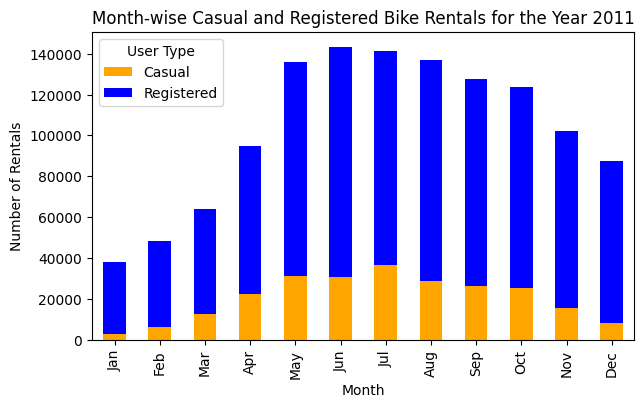

In [11]:
# stacked bar chart for year 2011
# YOUR CODE HERE
df_2011 = df[df['yr'] == 0]
pivot_data_2011 = df_2011.pivot_table(values=['casual', 'registered'], index=['mnth'], aggfunc='sum')

pivot_data_2011.plot(kind='bar', stacked=True, figsize=(7, 4), color=['orange', 'blue'])
plt.title('Month-wise Casual and Registered Bike Rentals for the Year 2011')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='User Type', labels=['Casual', 'Registered'])

plt.show()

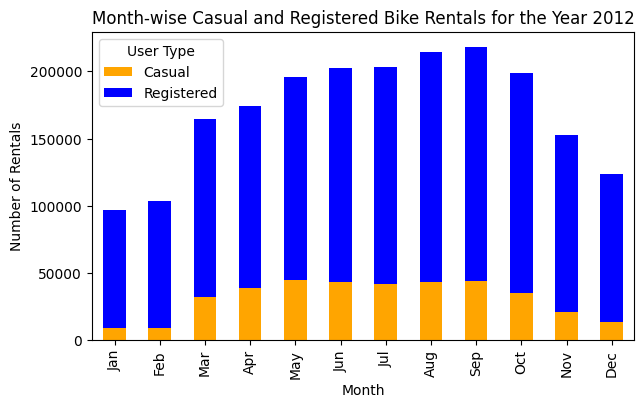

In [12]:
# stacked bar chart for year 2012
# YOUR CODE HERE
df_2012 = df[df['yr'] == 1]
pivot_data_2012 = df_2012.pivot_table(values=['casual', 'registered'], index=['mnth'], aggfunc='sum')

pivot_data_2012.plot(kind='bar', stacked=True, figsize=(7, 4), color=['orange', 'blue'])
plt.title('Month-wise Casual and Registered Bike Rentals for the Year 2012')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='User Type', labels=['Casual', 'Registered'])

plt.show()

#### Analyze the correlation between features with heatmap

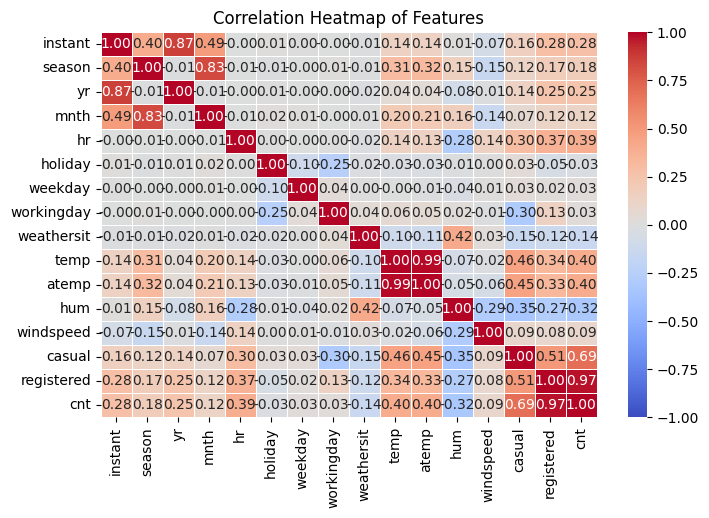

In [13]:
# YOUR CODE HERE
df_numeric = df.drop(columns=['dteday','weekday_name','working_day_status'])
correlation_matrix = df_numeric.corr() #ρ (X,Y) = cov (X,Y) / σX.σY.

plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()

#### Visualize the box plot of casual and registered variables to check the outliers

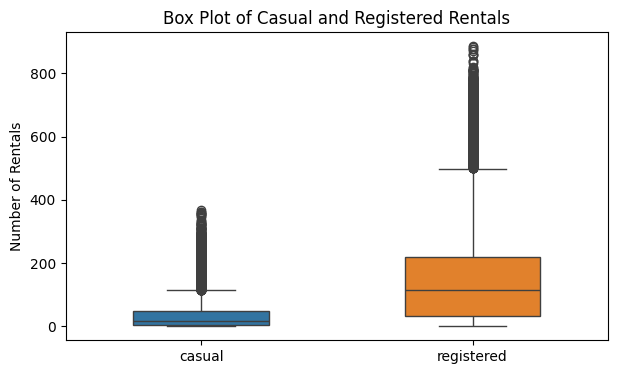

In [14]:
# YOUR CODE HERE
plt.figure(figsize=(7,4))
sns.boxplot(data=[df['casual'], df['registered']], width=0.5)
plt.title('Box Plot of Casual and Registered Rentals')
plt.ylabel('Number of Rentals')

plt.show()

### Pre-processing and Data Engineering (1 point)

#### Drop unwanted columns

In [17]:
# YOUR CODE HERE
df_new = df.drop(columns=['instant', 'dteday','weekday_name','working_day_status'])
#df.drop(columns=["instant", "dteday", "windspeed", "atemp"], inplace=True)

#### Identify categorical and continuous variables


In [16]:
# YOUR CODE HERE
df_new['casual'] = df_new['casual'].astype(float) #Converting Casual, Registered and Count as Float to group as continuous variable
df_new['registered'] = df_new['registered'].astype(float)
df_new['cnt'] = df_new['cnt'].astype(float)

df_cat = df_new.select_dtypes(include=['object', 'int']).columns.tolist()
df_cont = df_new.select_dtypes(include=['float64']).columns.tolist()

print("Categorical Variables:", df_cat)
print("Continuous Variables:", df_cont)

Categorical Variables: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
Continuous Variables: ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


#### Feature scaling

Feature scaling is essential for machine learning algorithms, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance. Apply scaling on the continuous variables on the given data.

Hint: `MinMaxScaler` or `StandardScaler`



In [18]:
# YOUR CODE HERE #y = (x — min) / (max-min)
scaler = MinMaxScaler()
df_new[df_cont] = scaler.fit_transform(df_new[df_cont])
df_new.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.224490,0.2879,0.81,0.0,0.008174,0.014673,0.015369
1,1,0,1,1,0,6,0,1,0.204082,0.2727,0.80,0.0,0.021798,0.036117,0.039959
2,1,0,1,2,0,6,0,1,0.204082,0.2727,0.80,0.0,0.013624,0.030474,0.031762
3,1,0,1,3,0,6,0,1,0.224490,0.2879,0.75,0.0,0.008174,0.011287,0.012295
4,1,0,1,4,0,6,0,1,0.224490,0.2879,0.75,0.0,0.000000,0.001129,0.000000


#### Apply one-hot encode on the categorical data

One-hot encoding is applied on the categorical variables, which should not have a different weight or order attached to them, it is presumed that all categorical variables have equivalent "values". This means that you cannot simply order them from zero to the number of categories as this would imply that the earlier categories have less "value" than later categories.

Hint: `sklearn.preprocessing.OneHotEncoder`

In [19]:
# YOUR CODE HERE
encoder = OneHotEncoder()
#encoded_val = encoder.fit_transform(df_new[df_cat])
#encoded_val

df_encoded = pd.get_dummies(df_new, dtype='int', columns=df_cat, drop_first=False)
df_encoded

,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.224490,0.2879,0.81,0.000000,0.008174,0.014673,0.015369,1,0,0,...,0,0,0,1,1,0,1,0,0,0
1,0.204082,0.2727,0.80,0.000000,0.021798,0.036117,0.039959,1,0,0,...,0,0,0,1,1,0,1,0,0,0
2,0.204082,0.2727,0.80,0.000000,0.013624,0.030474,0.031762,1,0,0,...,0,0,0,1,1,0,1,0,0,0
3,0.224490,0.2879,0.75,0.000000,0.008174,0.011287,0.012295,1,0,0,...,0,0,0,1,1,0,1,0,0,0
4,0.224490,0.2879,0.75,0.000000,0.000000,0.001129,0.000000,1,0,0,...,0,0,0,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.244898,0.2576,0.60,0.193018,0.029973,0.121896,0.120902,1,0,0,...,0,0,0,0,0,1,0,1,0,0
17375,0.244898,0.2576,0.60,0.193018,0.021798,0.091422,0.090164,1,0,0,...,0,0,0,0,0,1,0,1,0,0
17376,0.244898,0.2576,0.60,0.193018,0.019074,0.093679,0.091189,1,0,0,...,0,0,0,0,0,1,1,0,0,0
17377,0.244898,0.2727,0.56,0.157870,0.035422,0.054176,0.061475,1,0,0,...,0,0,0,0,0,1,1,0,0,0


#### Specify features and targets after applying scaling and one-hot encoding

In [20]:
# YOUR CODE HERE
X = df_encoded.drop(columns=['cnt','casual','registered'])
y = df_encoded[['cnt','casual','registered']]

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
       temp   atemp   hum  windspeed  season_1  season_2  season_3  season_4  \
0  0.224490  0.2879  0.81        0.0         1         0         0         0   
1  0.204082  0.2727  0.80        0.0         1         0         0         0   
2  0.204082  0.2727  0.80        0.0         1         0         0         0   
3  0.224490  0.2879  0.75        0.0         1         0         0         0   
4  0.224490  0.2879  0.75        0.0         1         0         0         0   

   yr_0  yr_1  ...  weekday_3  weekday_4  weekday_5  weekday_6  workingday_0  \
0     1     0  ...          0          0          0          1             1   
1     1     0  ...          0          0          0          1             1   
2     1     0  ...          0          0          0          1             1   
3     1     0  ...          0          0          0          1             1   
4     1     0  ...          0          0          0          1             1   

   workingday_1  weather

### Implement the linear regression by finding the coefficients using below approaches (2 points)

* Find the coefficients using normal equation

* (Optional) Implement batch gradient descent

* (Optional) SGD Regressor from sklearn

#### Select the features and target and split the dataset

As there are 3 target variables, choose the count (`cnt`) variable.

In [36]:
# YOUR CODE HERE
X = df_encoded.drop(columns=['cnt'])
y = df_encoded['cnt']

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
       temp   atemp   hum  windspeed    casual  registered  season_1  \
0  0.224490  0.2879  0.81        0.0  0.008174    0.014673         1   
1  0.204082  0.2727  0.80        0.0  0.021798    0.036117         1   
2  0.204082  0.2727  0.80        0.0  0.013624    0.030474         1   
3  0.224490  0.2879  0.75        0.0  0.008174    0.011287         1   
4  0.224490  0.2879  0.75        0.0  0.000000    0.001129         1   

   season_2  season_3  season_4  ...  weekday_3  weekday_4  weekday_5  \
0         0         0         0  ...          0          0          0   
1         0         0         0  ...          0          0          0   
2         0         0         0  ...          0          0          0   
3         0         0         0  ...          0          0          0   
4         0         0         0  ...          0          0          0   

   weekday_6  workingday_0  workingday_1  weathersit_1  weathersit_2  \
0          1             1             0  

#### Implementation using Normal Equation

$\theta = (X^T X)^{-1} . (X^T Y)$

$θ$ is the hypothesis parameter that defines the coefficients

$X$ is the input feature value of each instance

$Y$ is Output value of each instance

For performing Linear Regression Using the Normal Equation refer [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Performing%20Linear%20Regression%20using%20Normal%20equation.pdf).

To solve the normal equation compute least-squares solution by using `scipy.linalg`

Hint: [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)

In [37]:
# YOUR CODE HERE
X_bias = np.c_[np.ones((X.shape[0], 1)), X]
X_bias = np.array(X_bias)
y = np.array(y)
theta, resids, rank, s = lstsq(X_bias, y)

print("theta:", theta)

y_pred = X_bias.dot(theta)
print(y_pred)

theta: [ 3.72456524e-02  2.77555756e-15 -1.48492330e-15 -1.80411242e-16
 -8.29197822e-16  3.76024590e-01  9.07786885e-01 -4.42646294e-03
 -4.42646294e-03 -4.42646294e-03 -4.42646294e-03 -9.97870129e-03
 -9.97870129e-03 -7.89707389e-04 -7.89707389e-04 -7.89707389e-04
 -7.89707389e-04 -7.89707389e-04 -7.89707389e-04 -7.89707389e-04
 -7.89707389e-04 -7.89707389e-04 -7.89707389e-04 -7.89707389e-04
 -7.89707389e-04 -2.34117472e-04 -2.34117472e-04 -2.34117472e-04
 -2.34117472e-04 -2.34117472e-04 -2.34117472e-04 -2.34117472e-04
 -2.34117472e-04 -2.34117472e-04 -2.34117472e-04 -2.34117472e-04
 -2.34117472e-04 -2.34117472e-04 -2.34117472e-04 -2.34117472e-04
 -2.34117472e-04 -2.34117472e-04 -2.34117472e-04 -2.34117472e-04
 -2.34117472e-04 -2.34117472e-04 -2.34117472e-04 -2.34117472e-04
 -2.34117472e-04 -1.10772774e-02 -8.92027665e-03  7.48913179e-04
 -1.40808759e-03 -1.40808759e-03 -1.40808759e-03 -1.40808759e-03
 -1.40808759e-03  7.48913179e-04 -8.52819000e-03 -6.37118924e-03
 -3.98469926e-03 -

#### (Optional) Implementing Linear regression using batch gradient descent

Initialize the random coefficients and optimize the coefficients in the iterative process by calculating cost and finding the gradient.

Hint: [gradient descent](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_SNB_MiniProject_1_LinearRegression_Regularization_Multivariate%20Linear%20Regression.pdf)

In [ ]:
# YOUR CODE HERE

#### (Optional) SGD Regressor

Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters.

* Import SGDRegressor from sklearn and fit the data

* Predict the test data and find the error

Hint: [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

In [ ]:
# YOUR CODE HERE

### Linear regression using sklearn (3 points)

Implement the linear regression model using sklearn

* Import Linear Regression and fit the train data

* Predict the test data and find the error

Hint: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [32]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Model Performance on Test Data:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print("\nPredicted values (cnt) for the test set:")
print(y_pred)

Model Performance on Test Data:
Mean Squared Error (MSE): 1.7417470095370648e-31
Root Mean Squared Error (RMSE): 4.1734242649616454e-16
Mean Absolute Error (MAE): 3.312119110813888e-16

Predicted values (cnt) for the test set:
[0.43442623 0.08913934 0.00307377 ... 0.09938525 0.27151639 0.27254098]


#### Calculate the $R^2$ (coefficient of determination) of the actual and predicted data

In [33]:
# YOUR CODE HERE
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")

R-squared (R2): 1.0


#### Summarize the importance of features

Prediction is the weighted sum of the input values e.g. linear regression. Regularization, such as ridge regression and the elastic net, find a set of coefficients to use in the weighted sum to make a prediction. These coefficients can be used directly as a crude type of feature importance score.
This assumes that the input variables have the same scale or have been scaled prior to fitting a model.

Use the coefficients obtained through the sklearn Linear Regression implementation and create a bar chart of the coefficients.

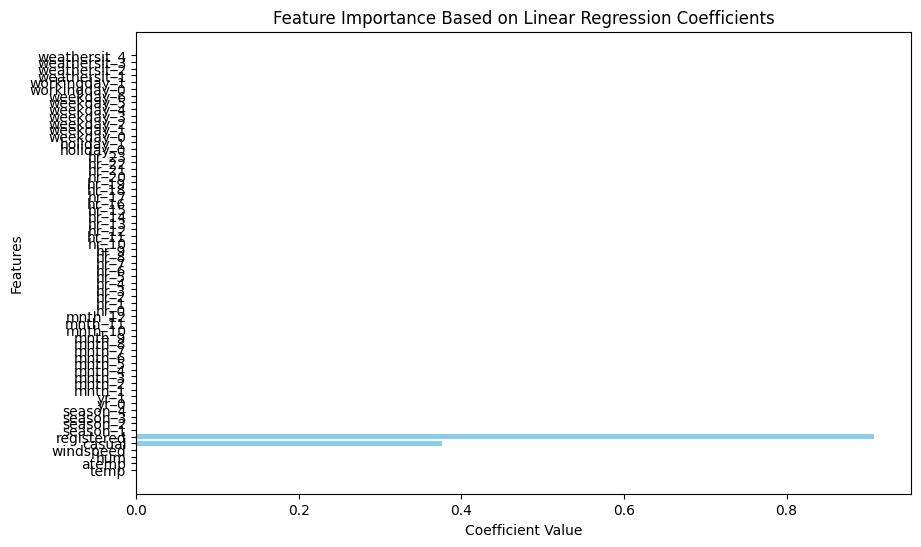

In [35]:
# YOUR CODE HERE
coefficients = model.coef_

feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance Based on Linear Regression Coefficients')
plt.show()

### Regularization methods (2 points)

#### Apply Lasso regression

* Apply Lasso regression with different alpha values given below and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [40]:
# setting up alpha
alpha = [0.0001, 0.001,0.01, 0.1, 1, 10, 100]

In [41]:
# YOUR CODE HERE
mse_values = []
rmse_values = []
mae_values = []
r2_values = []

for i in alpha:
    lasso_model = linear_model.Lasso(alpha=i)

    lasso_model.fit(X_train, y_train)

    y_pred = lasso_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_values.append(mse)
    rmse_values.append(rmse)
    mae_values.append(mae)
    r2_values.append(r2)

best_alpha = alpha[np.argmin(rmse_values)]

print(f"Best Alpha: {best_alpha}")
print(f"MSE: {mse_values[np.argmin(rmse_values)]}")
print(f"RMSE: {rmse_values[np.argmin(rmse_values)]}")
print(f"MAE: {mae_values[np.argmin(rmse_values)]}")
print(f"R-squared (R2): {r2_values[np.argmin(rmse_values)]}")

Best Alpha: 0.0001
MSE: 5.682841269005447e-07
RMSE: 0.0007538462223162923
MAE: 0.0005698746857347453
R-squared (R2): 0.9999829045700775


#### Apply Ridge regression

* Apply Ridge regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [42]:
# YOUR CODE HERE
mse_values = []
rmse_values = []
mae_values = []
r2_values = []

for i in alpha:
    ridge_model = linear_model.Ridge(alpha=i)

    ridge_model.fit(X_train, y_train)

    y_pred = ridge_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_values.append(mse)
    rmse_values.append(rmse)
    mae_values.append(mae)
    r2_values.append(r2)

best_alpha = alpha[np.argmin(rmse_values)]

print(f"Best Alpha: {best_alpha}")
print(f"MSE: {mse_values[np.argmin(rmse_values)]}")
print(f"RMSE: {rmse_values[np.argmin(rmse_values)]}")
print(f"MAE: {mae_values[np.argmin(rmse_values)]}")
print(f"R-squared (R2): {r2_values[np.argmin(rmse_values)]}")

Best Alpha: 0.0001
MSE: 4.5056757425676305e-15
RMSE: 6.712433048133613e-08
MAE: 4.928878510942458e-08
R-squared (R2): 0.9999999999998644


#### Apply Elasticnet regression

* Apply Elasticnet regression with different alpha values given and find the best alpha that gives the least error.
* Calculate the metrics for the actual and predicted

Hint: [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)

In [43]:
# YOUR CODE HERE
mse_values = []
rmse_values = []
mae_values = []
r2_values = []

for i in alpha:
    elasticnet_model = linear_model.ElasticNet(alpha=i)

    elasticnet_model.fit(X_train, y_train)

    y_pred = elasticnet_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_values.append(mse)
    rmse_values.append(rmse)
    mae_values.append(mae)
    r2_values.append(r2)

best_alpha = alpha[np.argmin(rmse_values)]

print(f"Best Alpha: {best_alpha}")
print(f"MSE: {mse_values[np.argmin(rmse_values)]}")
print(f"RMSE: {rmse_values[np.argmin(rmse_values)]}")
print(f"MAE: {mae_values[np.argmin(rmse_values)]}")
print(f"R-squared (R2): {r2_values[np.argmin(rmse_values)]}")

Best Alpha: 0.0001
MSE: 3.624966705179273e-07
RMSE: 0.0006020769639489019
MAE: 0.00047228769194165057
R-squared (R2): 0.9999890951794452


### Determine if there is a reduction in error if two target variables are considered

Consider (`Casual, Registered`) as target and find the error by implementing Linear Regression model from sklearn

### Report Analysis

* Describe your interpretation of the methods that are used to implement linear regression covered in this mini project.
* Comment on performance of the algorithms/methods used.
* Comment about the nature of the data and fitment of linear regression for this data.
* Can you perform a non linear curve fitting using linear regression? If yes, How?
